# 1. Hard-Margin SVM Optimization

## 1. Primal (constrained optimization problem)
$ \min_{w,b} \tfrac{1}{2}\|w\|^2 \quad \text{s.t. } y_i(w^\top x_i + b) \ge 1, \;\; \forall i $

---

## 2. Lagrangian
Introduce multipliers $\alpha_i \ge 0$ for each constraint:

$ \mathcal{L}(w,b,\alpha) = \tfrac{1}{2}\|w\|^2 - \sum_i \alpha_i \big( y_i(w^\top x_i + b) - 1 \big) $

---

## 3. KKT Conditions

### (a) Stationarity
$ \frac{\partial \mathcal{L}}{\partial w} = 0 \;\;\;\Rightarrow\;\;\; w = \sum_i \alpha_i y_i x_i $  
$ \frac{\partial \mathcal{L}}{\partial b} = 0 \;\;\;\Rightarrow\;\;\; \sum_i \alpha_i y_i = 0 $

### (b) Primal feasibility
$ y_i(w^\top x_i + b) \ge 1, \quad \forall i $

### (c) Dual feasibility
$ \alpha_i \ge 0, \quad \forall i $

### (d) Complementary slackness
$ \alpha_i \big( y_i(w^\top x_i + b) - 1 \big) = 0, \quad \forall i $

---

## 4. Dual Problem
$ \max_{\alpha} \;\; \sum_i \alpha_i - \tfrac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j (x_i^\top x_j) $  
subject to: $ \alpha_i \ge 0, \quad \sum_i \alpha_i y_i = 0 $

## 5. Solver
- QP Solver.
- Sequential Minimal Optimization.
- etc.

# 2. Soft Margin.
$ \displaystyle \argmin_{w,b,\xi\ge 0} \tfrac{1}{2}|w|^2 + C \sum_i \xi_i $

subject to:

$ y_i(w^\top x_i + b) \ge 1 - \xi_i, \quad \forall i $

- $\xi_i \ge 0$ are slack variables (how much each point is allowed to violate the margin).

- $C$ is the penalty strength for violations.

# 3. Usage.

In [ ]:
from sklearn.svm import LinearSVC

# Create the model.
clf = LinearSVC(C=1.0, max_iter=1_000)

# Fit.
clf.fit(X_train, y_train)

# Predict.
y_pred = clf.predict(X_test)

# Params.
print("w:", clf.coef_)        # Weight vector.
print("b:", clf.intercept_)   # Bias.


# c.f. ||w|| vs margin.

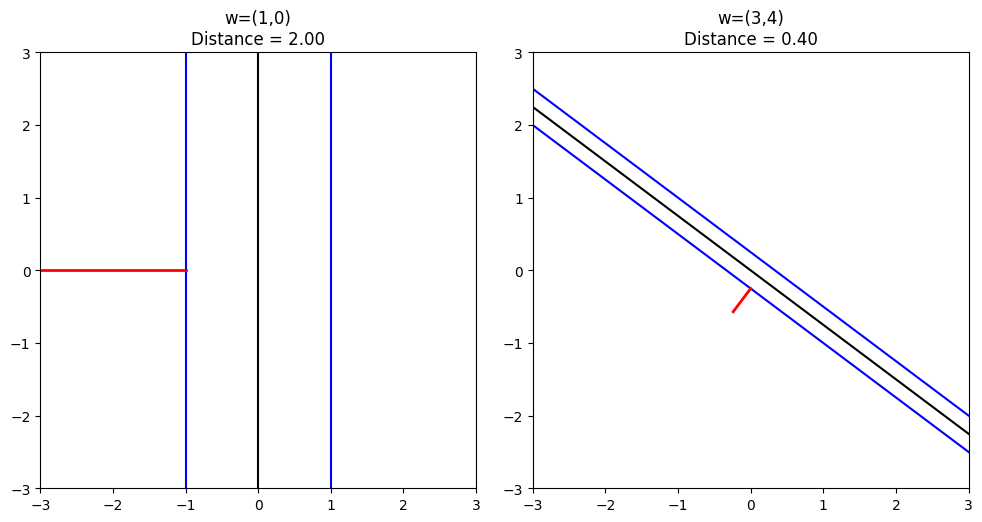

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lines(ax, w, b_vals, color, label):
    """
    Plot lines of form w[0]*x + w[1]*y + b = 0 for each b in b_vals
    """
    x = np.linspace(-5, 5, 400)
    if w[1] != 0:
        for b in b_vals:
            y = -(w[0]*x + b)/w[1]
            ax.plot(x, y, color=color)
    else:  # vertical lines if w[1]==0
        for b in b_vals:
            x_line = -b/w[0]
            ax.axvline(x_line, color=color)

def draw_margin_example(w, title, ax):
    # Two lines: w·x + b = ±1
    plot_lines(ax, w, [+1, -1], 'blue', 'margins')
    plot_lines(ax, w, [0], 'black', 'decision boundary')
    
    # pick a point on one line (w·x + b=+1)
    # e.g. find intersection with x=0
    if w[1] != 0:
        x0 = 0
        y0 = -(w[0]*x0 + 1)/w[1]
    else:
        x0 = -(1)/w[0]
        y0 = 0
    point = np.array([x0, y0])
    
    # direction of normal vector (unit vector)
    w = np.array(w)
    unit_w = w/np.linalg.norm(w)
    
    # distance between lines
    d = 2/np.linalg.norm(w)
    
    # draw perpendicular segment
    ax.plot([point[0], point[0]-unit_w[0]*d], [point[1], point[1]-unit_w[1]*d],
            color='red', linewidth=2)
    
    ax.set_title(f"{title}\nDistance = {d:.2f}")
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_aspect('equal')

fig, axs = plt.subplots(1,2, figsize=(10,5))

# Case 1: w = (1,0)
draw_margin_example((1,0), "w=(1,0)", axs[0])

# Case 2: w = (3,4)
draw_margin_example((3,4), "w=(3,4)", axs[1])

plt.tight_layout()
plt.show()
